In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

In [2]:
black_soil = os.path.join('../input/soil-types/Soil types/Black Soil')
cinder_soil = os.path.join('../input/soil-types/Soil types/Cinder Soil')
laterite_soil = os.path.join('../input/soil-types/Soil types/Laterite Soil')
peat_soil = os.path.join('../input/soil-types/Soil types/Peat Soil')
yellow_soil = os.path.join('../input/soil-types/Soil types/Yellow Soil')
        

In [3]:
dataset=os.path.join('../input/soil-types/Soil types')

In [4]:
a, b, c, d, e = len(black_soil), len(cinder_soil), len(laterite_soil), len(peat_soil), len(yellow_soil)
total=a+b+c+d+e
print("Total images: ", total)

Total images:  209


In [5]:
image_size = 220
batch_size = 10
target_size = (image_size, image_size)
input_shape = (image_size, image_size, 3)

In [6]:
from skimage.io import imread, imshow
from skimage.transform import resize

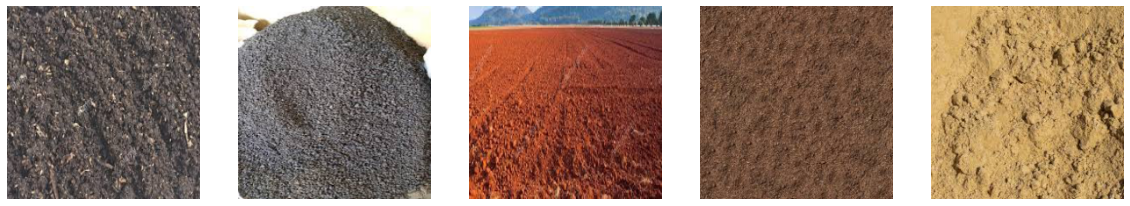

In [7]:
soil_type=["Black Soil","Cinder Soil","Laterite Soil","Peat Soil","Yellow Soil"]
fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize = (20,20))
for i in range(0,5):
    img  = imread('../input/soil-types/Soil types/'+soil_type[i]+'/10.jpg')
    img  = resize(img, (220,220))
    ax[i].imshow(img)
    ax[i].axis('off')

In [8]:
# from sklearn.model_selection import train_test_split
# training_data, testing_data = train_test_split(dataset, test_size=0.1, random_state=25)

In [9]:
train_datagen = ImageDataGenerator(rescale=1/255,rotation_range=30,
                                   horizontal_flip=False,
                                   vertical_flip=True,
                                   brightness_range=(0.2, 0.5),
                                   width_shift_range=0.3,
                                   height_shift_range=0.1,
                                   zoom_range=0.3,

                                   fill_mode='nearest')

# test_datagen  = ImageDataGenerator(rescale=1./255)



train_generator = train_datagen.flow_from_directory(
        '../input/soil-types/Soil types/', 
        target_size=(image_size, image_size),
        batch_size = batch_size,
        classes = [ 'Black Soil','Cinder Soil', 'Laterite Soil','Peat Soil','Yellow Soil'],
       class_mode='categorical')

# test_datset = test_datagen.flow_from_directory(
#     '../input/soil-classification-image-data/Soil_Dataset/Test',
#     target_size = (224,224),
#     class_mode = 'categorical',
#     batch_size = 64)


Found 156 images belonging to 5 classes.


In [10]:
for image_batch, label_batch in train_generator:
  break
  image_batch.shape, label_batch.shape

In [11]:
print (train_generator.class_indices)

{'Black Soil': 0, 'Cinder Soil': 1, 'Laterite Soil': 2, 'Peat Soil': 3, 'Yellow Soil': 4}


In [12]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(220, 220, 3)),
    tf.keras.layers.MaxPooling2D(3, 3),

    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(3,3),

    
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(64, activation='relu'),

    tf.keras.layers.Dense(5, activation='softmax')
])



In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 218, 218, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 72, 72, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 70, 70, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 33, 33, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        1

In [14]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer= RMSprop(learning_rate=0.001),
              metrics=['acc'])

In [15]:
total_sample = train_generator.n
n_epochs = 30

In [16]:
history = model.fit(
        train_generator, 
        steps_per_epoch = int(total_sample/batch_size),  
        epochs = n_epochs)

Epoch 1/30
15/15 [==============================] - 5s 287ms/step - loss: 1.6090 - acc: 0.2000
Epoch 2/30
15/15 [==============================] - 4s 247ms/step - loss: 1.4459 - acc: 0.2897
Epoch 3/30
15/15 [==============================] - 4s 261ms/step - loss: 1.2274 - acc: 0.4012
Epoch 4/30
15/15 [==============================] - 4s 264ms/step - loss: 1.1564 - acc: 0.3877
Epoch 5/30
15/15 [==============================] - 4s 250ms/step - loss: 1.0191 - acc: 0.3994
Epoch 6/30
15/15 [==============================] - 4s 253ms/step - loss: 1.0793 - acc: 0.3808
Epoch 7/30
15/15 [==============================] - 4s 250ms/step - loss: 1.1025 - acc: 0.4596
Epoch 8/30
15/15 [==============================] - 4s 273ms/step - loss: 0.9476 - acc: 0.5307
Epoch 9/30
15/15 [==============================] - 4s 247ms/step - loss: 1.0550 - acc: 0.4615
Epoch 10/30
15/15 [==============================] - 4s 245ms/step - loss: 1.0935 - acc: 0.5626
Epoch 11/30
15/15 [==============================

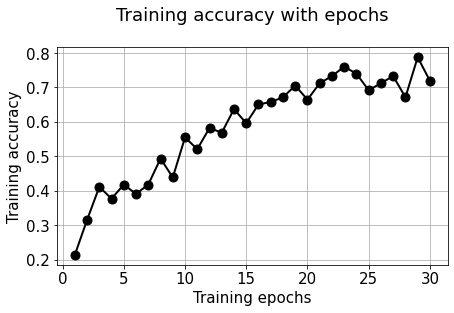

In [17]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history.history['acc'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training accuracy with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training accuracy",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [18]:
soil_type


['Black Soil', 'Cinder Soil', 'Laterite Soil', 'Peat Soil', 'Yellow Soil']

In [19]:
from keras.preprocessing import image
import cv2


In [20]:
def fun(path):
  img = cv2.imread(path)
  im_resize = cv2.resize(img,(220,220),interpolation=cv2.INTER_LINEAR)
  plt.imshow(cv2.cvtColor(im_resize,cv2.COLOR_BGR2RGB))


  image_pred = image.load_img(path,target_size=(220,220))
  image_pred = image.img_to_array(image_pred)
  a = np.expand_dims(image_pred,axis=0)
  result = model.predict_classes(a)
  prob = model.predict_proba(a)
  print('prediction class',result)
  print('probability:{}'.format(prob[0]))
  if result[0]==0:
    prediction='Black_Soil'
  elif result[0]==1:
    prediction='Cinder Soil'
  elif result[0]==2:
    prediction='Laterite_Soil'
  elif result[0]==3:
    prediction='Peat_Soil'
  else:
    prediction ='Yellow_Soil'
    
    
  print('predicition_class:',prediction)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


prediction class [1]
probability:[0. 1. 0. 0. 0.]
predicition_class: Cinder Soil


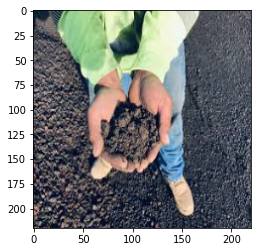

In [21]:
fun('../input/soil-types/Soil types/Cinder Soil/17.jpg')

prediction class [4]
probability:[0. 0. 0. 0. 1.]
predicition_class: Yellow_Soil


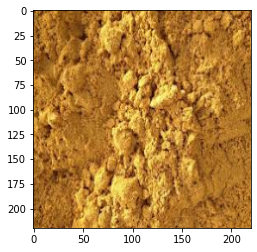

In [22]:
fun('../input/soil-types/Soil types/Yellow Soil/13.jpg')